In [1]:
%matplotlib inline
import matplotlib.pyplot as plt #For plots
import pandas as pd #For Dataframes
import numpy as np #For scientific computing 

In [23]:
import keras

from keras.models import Sequential, load_model
from keras.utils import to_categorical
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.callbacks import ModelCheckpoint
from keras import backend as K

In [3]:
batch_size = 256

num_classes = 10

epochs = 10

In [5]:
# Input image dimensions

img_rows, img_cols = 28, 28

In [6]:
Emnist_file_path = "C:/Users/praga/OneDrive/Documents/Rutgers/Rutgers_Misc/Additional or Extra Files/Rutgers Project 3/ShellLearn/emnist/"

In [7]:
All_train = Emnist_file_path + 'emnist-digits-train.csv'
All_test = Emnist_file_path + 'emnist-digits-test.csv'

In [8]:
All_train_data = pd.read_csv(All_train)
All_test_data = pd.read_csv(All_test)

In [9]:
All_training_data = All_train_data.values
All_testing_data = All_test_data.values

In [10]:
print(type(All_training_data))
print(type(All_testing_data))
print(All_training_data.shape)
print(All_testing_data.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(239999, 785)
(39999, 785)


In [11]:
x_train = All_training_data[:, 1:].astype('float32')
y_train = All_training_data[:, 0:1]
print('x_train shape : ', x_train.shape)
print('y_train shape : ', y_train.shape)

x_train shape :  (239999, 784)
y_train shape :  (239999, 1)


In [12]:
x_test = All_testing_data[:, 1:].astype('float32')
y_test = All_testing_data[:, 0:1]
print('x_test shape : ', x_test.shape)
print('y_test shape : ', y_test.shape)

x_test shape :  (39999, 784)
y_test shape :  (39999, 1)


In [13]:
# for conv2d
x_train = np.array(list(map(lambda x : x.reshape(28, 28).transpose().reshape(28, 28, 1), x_train)))
x_test = np.array(list(map(lambda x : x.reshape(28, 28).transpose().reshape(28, 28, 1), x_test)))

In [14]:
input_shape = (img_rows, img_cols, 1)

In [17]:
print(type(x_train))
print('x_train shape : ', x_train.shape)

<class 'numpy.ndarray'>
x_train shape :  (239999, 28, 28, 1)


In [18]:
print(type(x_test))
print('x_test shape : ', x_test.shape)

<class 'numpy.ndarray'>
x_test shape :  (39999, 28, 28, 1)


In [19]:
# Make it 0 based indices
y_train = y_train - 1
y_test = y_test - 1

In [20]:
# Scale from 0 to 255
x_train /= 255
x_test /= 255

In [21]:
# Encode Categorical Integer Labels Using a One-Hot Scheme.# One-hot encode the labels

# Convert class vectors to binary class matrices

y_train = keras.utils.to_categorical(y_train, num_classes)

y_test = keras.utils.to_categorical(y_test, num_classes)

In [24]:
# Set the CNN Architecture

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [ ]:
# # for conv2D
# model = Sequential()
# model.add(Conv2D(64, (5, 5),input_shape=(28, 28, 1), activation='relu'))
# model.add(MaxPooling2D((2, 2), (2, 2)))
# model.add(Flatten())
# model.add(Dropout(0.5))
# model.add(Dense(64, activation='relu'),)
# model.add(Dense(num_classes, activation='softmax'))

In [25]:
# Compile the Model

model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(),metrics=['accuracy'])

In [ ]:
# Compile the Model

# model.compile(loss='categorical_crossentropy', optimizer='rmsprop', #or adams
#               metrics=['accuracy'])

In [26]:
# We can summarize our model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
__________

In [27]:
# Calculate the Classification Accuracy on the Test Set (Before Training)

score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]
print('Before Training - Test accuracy: %.4f%%' % accuracy)

Before Training - Test accuracy: 6.1002%


In [28]:
# Train the model

checkpointer = ModelCheckpoint(filepath='emnist.digits.cnn.model.best.hdf5', verbose=1, save_best_only=True)

In [29]:
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs,
          validation_split=0.2, callbacks=[checkpointer],
          verbose=1, shuffle=True)

Train on 191999 samples, validate on 48000 samples
Epoch 1/10
191999/191999 [==============================] - 441s 2ms/step - loss: 0.1773 - acc: 0.9471 - val_loss: 0.0410 - val_acc: 0.9880

Epoch 00001: val_loss improved from inf to 0.04099, saving model to emnist.digits.cnn.model.best.hdf5
Epoch 2/10
191999/191999 [==============================] - 680s 4ms/step - loss: 0.0580 - acc: 0.9836 - val_loss: 0.0322 - val_acc: 0.9906

Epoch 00002: val_loss improved from 0.04099 to 0.03222, saving model to emnist.digits.cnn.model.best.hdf5
Epoch 3/10
191999/191999 [==============================] - 667s 3ms/step - loss: 0.0449 - acc: 0.9874 - val_loss: 0.0279 - val_acc: 0.9920

Epoch 00003: val_loss improved from 0.03222 to 0.02793, saving model to emnist.digits.cnn.model.best.hdf5
Epoch 4/10
191999/191999 [==============================] - 680s 4ms/step - loss: 0.0384 - acc: 0.9889 - val_loss: 0.0284 - val_acc: 0.9914

Epoch 00004: val_loss did not improve from 0.02793
Epoch 5/10
191999/19

In [31]:
# Load the Model with the Best Classification Accuracy on the Validation Set

model.load_weights('emnist.digits.cnn.model.best.hdf5')

In [32]:
# Save the best model

model.save('eminst_digits_cnn_model.h5')

In [33]:
# Evaluate test accuracy

score = model.evaluate(x_test, y_test, verbose=0)

accuracy = 100*score[1]
loss = 100*score[0]

In [34]:
print('Test accuracy: %.4f%%' % accuracy)
print('Test loss: %.4f%%' % loss)

Test accuracy: 99.4650%
Test loss: 1.8860%


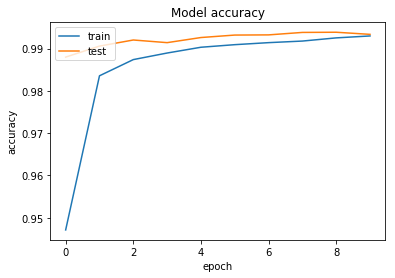

In [35]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

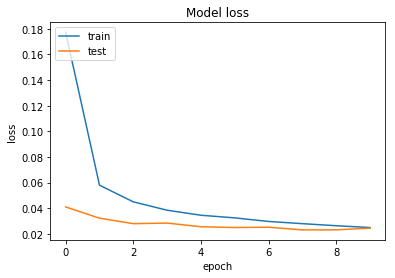

In [36]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Making Predictions
We can use our trained model to make predictions using model.predict

In [37]:
test = np.expand_dims(x_train[3], axis=0)
test.shape

(1, 28, 28, 1)

In [38]:
# Make a prediction. The resulting class should match the digit
print(f"One-Hot-Encoded Prediction: {model.predict(test).round()}")
print(f"Predicted class: {model.predict_classes(test)}")

One-Hot-Encoded Prediction: [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]
Predicted class: [5]


In [81]:
filepath = "uploads/num5.png"

In [82]:
from keras.preprocessing import image
image_size = (28, 28)
im = image.load_img(filepath, target_size=image_size, grayscale=True)
im

C:\Anaconda3\lib\site-packages\keras_preprocessing\image.py:492: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


In [83]:
# Convert the image to a numpy array 
from keras.preprocessing.image import img_to_array
image = img_to_array(im)
image.shape
image1 = image.reshape(1,28,28,1)

In [84]:
# Scale the image pixels by 255 (or use a scaler from sklearn here)
image /= 255

# Flatten into a 1x28*28 array 
img = image.flatten().reshape(-1, 28*28)
img.shape

(1, 784)

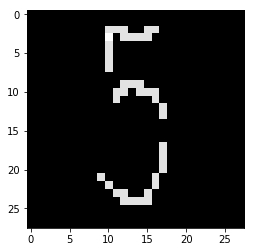

In [85]:
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

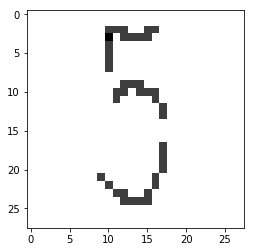

In [86]:
# # Invert the pixel values to match the original data
img = 1 - img
plt.imshow(img.reshape(28, 28), cmap=plt.cm.Greys)

In [87]:
# Make predictions
pred = model.predict_classes(image1)

In [88]:
pred[0]+1

8